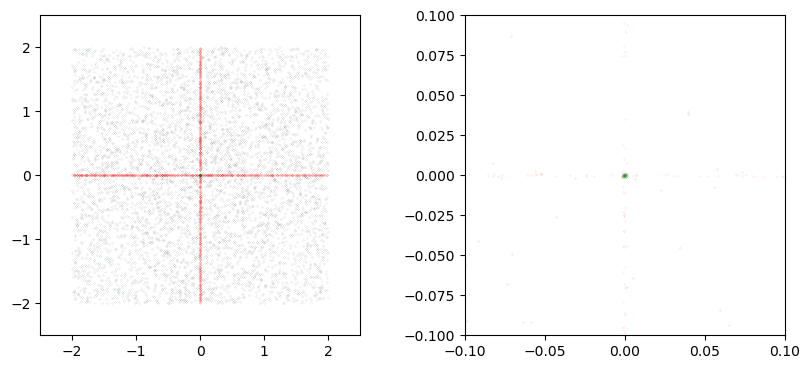

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import uproot

### imager plane at z=300 (mm)
imgz = 300

#rootfname  = "test_gamma1kev.root"
rootfname  = "gamma1kev_n1e4.root"

rootfile = uproot.open(rootfname)
tevthits = rootfile["tEventHits"]

vposx = tevthits["posX"].array()
vposy = tevthits["posY"].array()
vposz = tevthits["posZ"].array()
vnhits = tevthits["NumHitData"].array()

vsel_focal = np.fabs(vposz-imgz)<0.1
vcut_infov = np.logical_and(np.fabs(vposx)<62.0, np.fabs(vposy)<62.0)
vcut = np.logical_and(vsel_focal, vcut_infov)
ncut = np.sum(vcut*1)
#ncut = int((vcut*1).sum())

sigma = 0.0
#sigma = 0.371 ## 10 arcmin at 300 mm focal length
#sigma = 0.185 ### 5 arcmin at 300 mm focal length
vpsfx = vposx[vcut] + np.random.normal(0.0, sigma, ncut)
vpsfy = vposy[vcut] + np.random.normal(0.0, sigma, ncut)
vpsfnhits = vnhits[vcut]


fig, axs = plt.subplots(1,2, figsize=(9,4))
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.12, top=0.92, wspace=0.1)

axs[0].set_xlim(-2.5,2.5)
axs[0].set_ylim(-2.5,2.5)
axs[1].set_xlim(-0.1,0.1)
axs[1].set_ylim(-0.1,0.1)
axs[0].set_aspect('equal')
axs[1].set_aspect('equal')

nhits_list = [3,5,7,9,11,13]
color_list = ['k', 'r', 'g', 'b', 'm']

num = len(nhits_list)
#for nhits in nhits_list :
for idx in range(num) :
    nhits = nhits_list[idx]

    if idx<len(color_list) :
        color = color_list[idx]
    else :
        color = color_list[-1]
    
    
    vcuthit = vpsfnhits==nhits
    axs[0].plot(vpsfx[vcuthit],vpsfy[vcuthit], '.', ms=0.1, color=color)
    axs[1].plot(vpsfx[vcuthit],vpsfy[vcuthit], '.', ms=0.1, color=color)

